In [149]:
import pandas as pd #import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



aapl = pd.read_csv("papka/AAPL.csv", parse_dates = True) #output random records from the dataset
aapl.sample(n=10)


,Date,Open,High,Low,Close,Adj Close,Volume
54,2014-08-01,23.725000,25.725000,23.320000,25.625000,22.696957,3748308000
9,2010-11-01,10.793571,11.475000,10.634286,11.112500,9.407837,9508086000
108,2019-02-01,41.740002,43.967499,41.482498,43.287498,41.494865,1890162400
40,2013-06-01,16.097500,16.229643,13.888214,14.161786,12.246858,7018536000
166,2023-12-01,190.330002,199.619995,187.449997,192.529999,192.284637,1062774800
169,2024-03-01,179.550003,180.529999,168.490005,171.479996,171.479996,1432782800
116,2019-10-01,56.267502,62.437500,53.782501,62.189999,60.329151,2433210800
102,2018-08-01,49.782501,57.217499,49.327499,56.907501,54.171169,2801275600
124,2020-06-01,79.437500,93.095001,79.302498,91.199997,89.188095,3243375600
17,2011-07-01,11.998214,14.446429,11.935714,13.945714,11.806432,10653946800


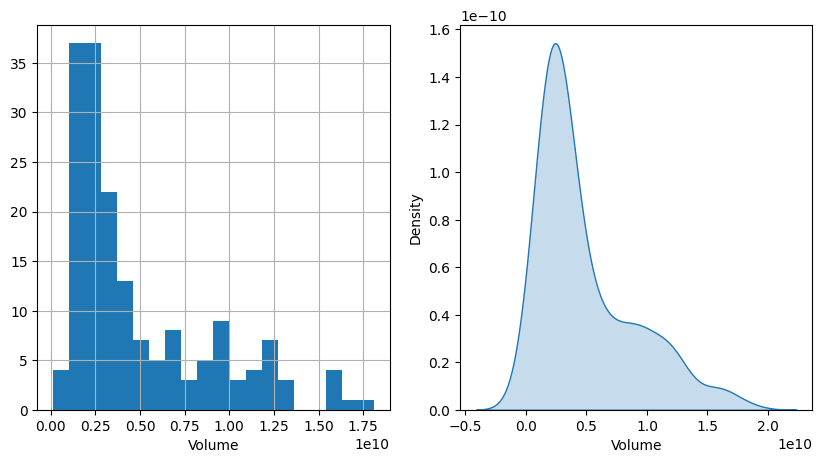

In [150]:
plt.figure(figsize=(10,5)) #visualise our target value, namely the "Volume" column

plt.subplot(121)
aapl.Volume.hist(density=False, bins=20)
plt.xlabel('Volume')

plt.subplot(122)
sns.kdeplot(aapl['Volume'], fill=True, legend=False)
plt.xlabel('Volume')

plt.show()

In [151]:
median_Volume = aapl['Volume'].median() #find measures of the central tendency of our target attribute (column "Volume")
mean_Volume = round(aapl['Volume'].mean(), 2)
mode_Volume = aapl['Volume'].mode()[0]

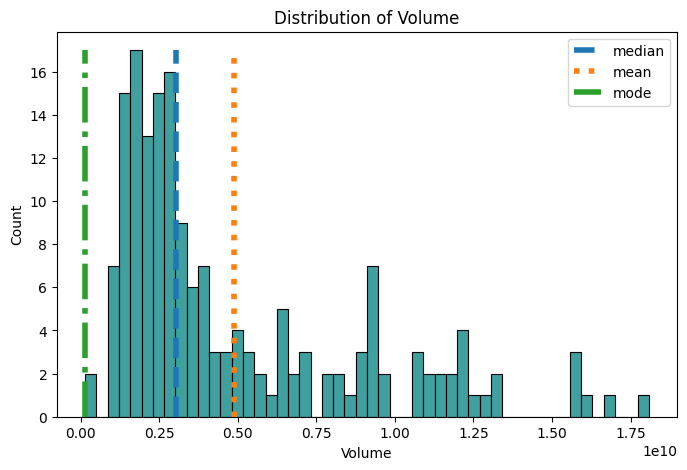

In [152]:
plt.figure(figsize=(8, 5)) #visualise these measures of central tendency on a graph
sns.histplot(aapl['Volume'], bins=50, color='teal')

l = np.linspace(0, 17, 10)
plt.plot([median_Volume] * 10, l, label='median', linestyle='--', linewidth=4)
plt.plot([mean_Volume] * 10, l, label='mean', linestyle=':', linewidth=4)
plt.plot([mode_Volume] * 10, l, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Volume')
plt.legend()
plt.show()

In [153]:
Q1, Q3 = aapl['Volume'].quantile([0.25, 0.75]) #using IQR to find the emissions in the "Volume" column
IQR = Q3 - Q1
lower_limit, upper_limit = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  
aapl[(aapl["Volume"] < lower_limit) | (aapl["Volume"] > upper_limit)]

,Date,Open,High,Low,Close,Adj Close,Volume
3,2010-05-01,9.422857,9.567143,7.116071,9.174286,7.766945,18082654800
4,2010-06-01,9.274643,9.964643,8.650000,8.983214,7.605187,16651252800
5,2010-07-01,9.082143,9.499643,8.557143,9.187500,7.778133,15669704400
18,2011-08-01,14.206429,14.267857,12.607857,13.743929,11.635601,16142599200
25,2012-03-01,19.577499,22.194643,18.436428,21.412500,18.127808,15584338000
26,2012-04-01,21.493929,23.000000,19.821428,20.856428,17.657038,15598990400


In [154]:
aapl_new = aapl[(aapl["Volume"] > lower_limit) & (aapl["Volume"] < upper_limit)] #Now let's clean up these emissions

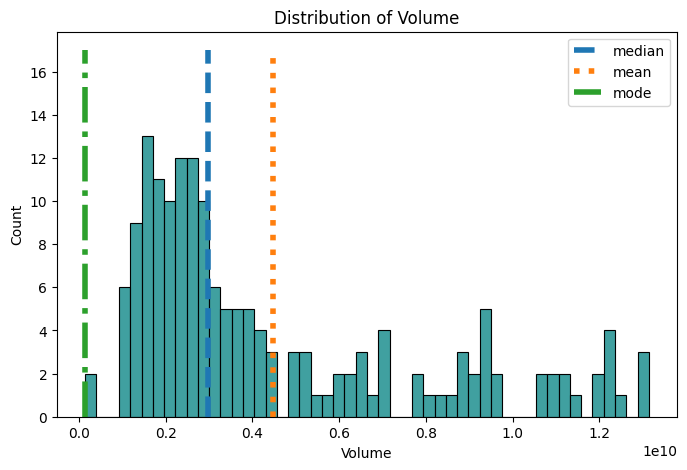

In [155]:
median_Volume1 = aapl_new['Volume'].median() #visualise again
mean_Volume1 = round(aapl_new['Volume'].mean(), 2)
mode_Volume1 = aapl_new['Volume'].mode()[0]

plt.figure(figsize=(8, 5))
sns.histplot(aapl_new['Volume'], bins=50, color='teal')

l = np.linspace(0, 17, 10)
plt.plot([median_Volume1] * 10, l, label='median', linestyle='--', linewidth=4)
plt.plot([mean_Volume1] * 10, l, label='mean', linestyle=':', linewidth=4)
plt.plot([mode_Volume1] * 10, l, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Volume')
plt.legend()
plt.show()

In [156]:
Q11, Q33 = aapl_new['Volume'].quantile([0.25, 0.75]) #emissions testing
IQR1 = Q33 - Q11
lower_limit1, upper_limit1 = Q11 - 1.5 * IQR1, Q33 + 1.5 * IQR1  
aapl_new[(aapl_new["Volume"] < lower_limit1) | (aapl_new["Volume"] > upper_limit1)]


,Date,Open,High,Low,Close,Adj Close,Volume
20,2011-10-01,13.584643,15.239286,12.651429,14.456429,12.238804,13141427600
33,2012-11-01,21.365000,21.535713,18.062500,20.902857,17.772329,12929851200
35,2013-01-01,19.779285,19.821428,15.535714,16.267500,13.894361,13123423600


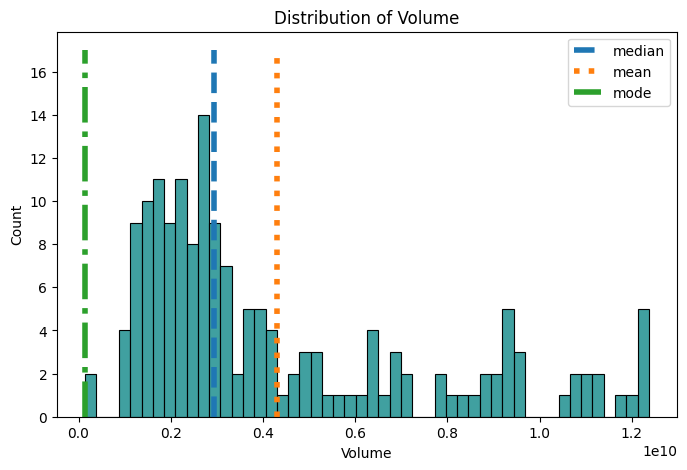

In [157]:
aapl_new = aapl_new[(aapl_new["Volume"] > lower_limit1) & (aapl_new["Volume"] < upper_limit1)] #we notice that there are still emissions, so we repeat what we did before and visualise it
median_Volume1 = aapl_new['Volume'].median()
mean_Volume1 = round(aapl_new['Volume'].mean(), 2)
mode_Volume1 = aapl_new['Volume'].mode()[0]

plt.figure(figsize=(8, 5))
sns.histplot(aapl_new['Volume'], bins=50, color='teal')

l = np.linspace(0, 17, 10)
plt.plot([median_Volume1] * 10, l, label='median', linestyle='--', linewidth=4)
plt.plot([mean_Volume1] * 10, l, label='mean', linestyle=':', linewidth=4)
plt.plot([mode_Volume1] * 10, l, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Volume')
plt.legend()
plt.show()


In [158]:
Q11, Q33 = aapl_new['Volume'].quantile([0.25, 0.75]) #check for emissions again (note that there are no more emissions left)
IQR1 = Q33 - Q11
lower_limit1, upper_limit1 = Q11 - 1.5 * IQR1, Q33 + 1.5 * IQR1  
aapl_new[(aapl_new["Volume"] < lower_limit1) | (aapl_new["Volume"] > upper_limit1)]


,Date,Open,High,Low,Close,Adj Close,Volume


In [159]:
aapl_new.isnull().sum() #check the entire dataset for missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [160]:
aapl_new.info() #find out the data types of each column

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 172
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       164 non-null    object 
 1   Open       164 non-null    float64
 2   High       164 non-null    float64
 3   Low        164 non-null    float64
 4   Close      164 non-null    float64
 5   Adj Close  164 non-null    float64
 6   Volume     164 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [161]:
features_aapl_new = aapl_new.select_dtypes(include=['float64']) #Now we will work with other attributes of our dataset
features_aapl_new.sample(n=7)

,Open,High,Low,Close,Adj Close
83,28.950001,30.610001,28.690001,30.337500,28.197571
151,156.639999,164.259995,138.000000,138.199997,137.029358
167,187.149994,196.380005,180.169998,184.399994,184.164993
120,76.074997,81.805000,64.092499,68.339996,66.494179
72,24.117500,24.722500,23.147499,24.172501,21.978434
0,6.870357,7.327500,6.816071,7.307857,6.186827
2,8.478929,9.730714,8.312500,9.324643,7.894238


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>, <Axes: >]], dtype=object)

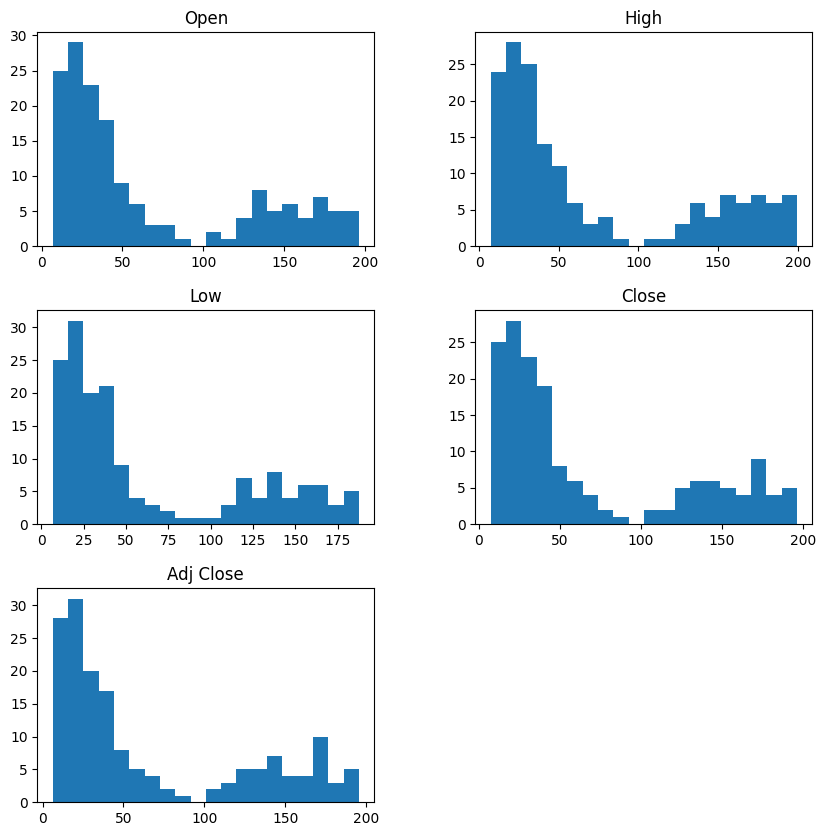

In [162]:
features_aapl_new.hist(figsize=(10, 10), bins=20, grid=False) #visualise them

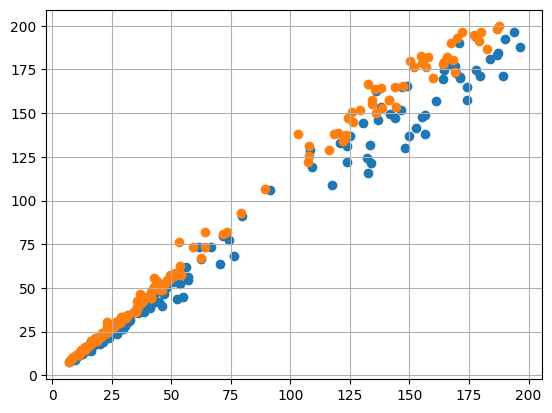

In [163]:
plt.scatter(features_aapl_new['Open'], features_aapl_new['Close']) #let's check the columns for linear relationship (note that it is present)
plt.scatter(features_aapl_new['Low'], features_aapl_new['High'])
plt.grid()

<Axes: >

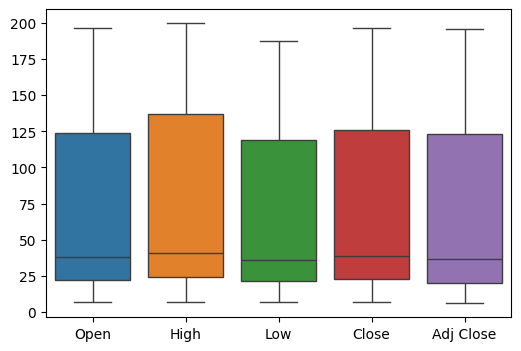

In [164]:
plt.figure(figsize=(6, 4)) #also check the signs for outliers
sns.boxplot(features_aapl_new)

<Axes: >

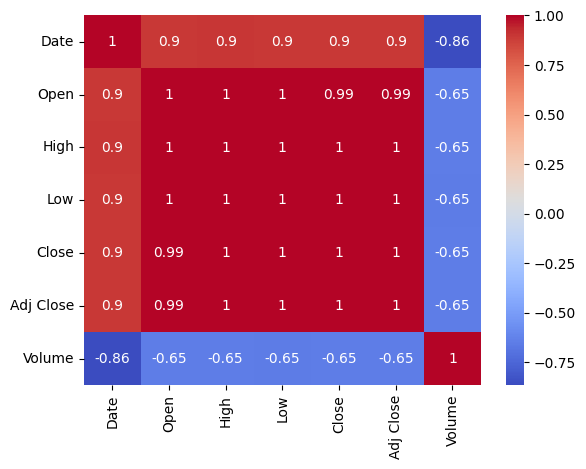

In [165]:
aapl_new['Date'] = pd.to_datetime(aapl['Date']) #Let's build the correlation matrix and notice that all features have a linear relationship with each other
sns.heatmap(aapl_new.corr(), annot = True, cmap= 'coolwarm') #However, we note that these attributes have no correlation with our target value (we do not look at the date)

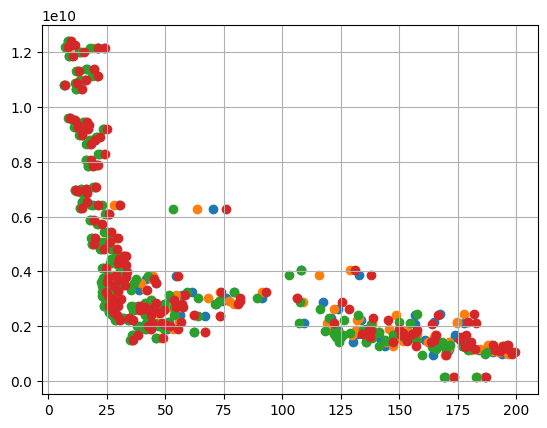

In [166]:
plt.scatter(aapl_new['Open'], aapl_new['Volume']) #make sure that the signs are not related to our target value (column "Volume")
plt.scatter(aapl_new['Close'], aapl_new['Volume'])
plt.scatter(aapl_new['Low'], aapl_new['Volume'])
plt.scatter(aapl_new['High'], aapl_new['Volume'])

plt.grid()